## Objective: Backtest a stock trading strategy

Profit from trade = sell price - buy price
Profit % = 100 * (Profit / buy price)

1) Generate random price history of stocks
- Write a function which generates a pandas dataframe with a single column called "price"


Method: 
Assume rate of change of price is normally distributed with Mean = 0 and Std. Deviation = 0.1.
                        (price(t+1)-price(t))/price(t)   ~    N(0 ,0.1)

price (t = 0) = 1.0
Note: Discard the series if any price goes <=0 

2) Trading rules are:
- if current units purchased > 0:

	(price today - price yesterday < - 0.01), purchase 1 unit

	(price today - price yesterday > 0.11), sell everything

- if current units purchased = 0:

	(price today > price yesterday), buy 1 unit

Note: If you dont have enough capital left, then cannot purchase more units. For eg, if starting with 100 units of money and purchase 100 units of stock at approximately price 1, then you cannot purchase 1 more. 

3) Start with initial total net worth of x. Calculate total profits earned. 
Note : Net worth cannot go <= 0. stop trading when this happens

4) Repeat it 100 times to calculate average statistics of above metric

5) Simulate the above for different values of x = [1, 10,100,1000] and calculate average profit earned as percent of initial capital and fraction of times you go broke (Net worth = 0 or if you are not able to take a trade)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Point 1 

In [2]:
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1 # Mean
        self.b1 = b1 # SD
        self.c1 = c1 # Normal Distribution values
        
    def dist_curve(self):
        plt.plot(self.c1, 
                 1/(self.b1 * np.sqrt(2 * np.pi)) * np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ),
                 linewidth=2,
                 color='y')
        plt.show()

Parameters 

loc   : [float or array_like] Mean of  the distribution. 

scale : [float or array_like]Standard Derivation of the distribution. 
    
size  : [int or int tuples]. 
    
Output shape given as (m, n, k) then m*n*k samples are drawn. If size is  None(by default), then a single value is returned. 

Return :

Array of defined shape, filled with  random values following normal distribution.

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


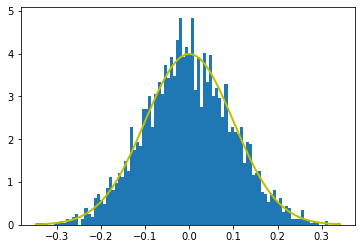

In [3]:

#Vary the mean and SD to generate different plots
mean1 = 0
sd1 = 0.1

c = np.random.normal(mean1, sd1, 3000)
        
n, bins, patches = plt.hist(c, 100, normed=True) #hist

hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()


c is the actual list of normal distribution values with mean of 0 and standard deviation of 0.1

Assume rate of change of price is normally distributed with Mean = 0 and  Std. Deviation = 0.1.
(price(t+1)-price(t))/price(t)   ~ N(0 ,0.1)

price (t = 0) = 1.0
Note: Discard the series if any price goes <=0 


In [4]:
len(c)

3000

In [5]:
#Consolidated function
def generate_price():
    prices = np.array([1.0] * 3000)
    prices = np.array([(prices[i-1] * item) + prices[i-1] for i,item in enumerate(c)])
    return prices

The generated prices series is non - negative with the rate of price change being a normal distribution of mean = 0 and S.D = 0.1

### Point 2 & 3

Trading rules are:
- if current units purchased > 0:

	(price today - price yesterday < - 0.01), purchase 1 unit

	(price today - price yesterday > 0.11), sell everything

- if current units purchased = 0:
	(price today > price yesterday), buy 1 unit

Note: if you dont have enough capital left, then cannot purchase more units. For eg, if starting with 100 units of money and purchase 100 units of stock at approximately price 1, then you cannot purchase 1 more. 


In [6]:
def trading(balance):
    prices = generate_price()
    broke = np.array([0] * len(prices))
    stocks = np.array([0] * len(prices))
    profits = np.array([0] * len(prices))
    pper = np.array([0] * len(prices))
    s = 0
    for i in range(len(prices)):
        if sum(stocks) > 0:
            if prices[i] - prices[i-1] < -0.01:
                if balance - prices[i] > 0:
                    stocks[i] = 1
                    balance = balance - prices[i]
                else:
                    broke[i] = 1
            if prices[i] - prices[i-1] > 0.11:
                # sell all for profit
                profits[i] = (prices[i]*sum(stocks)) - sum(prices * stocks)
                pper[i] = profits[i] / (sum(stocks * prices))
                balance = balance + (prices[i]*sum(stocks))
                stocks = np.array([0] * len(prices))

        elif sum(stocks) == 0:
            if balance - prices[i] > 0:
                stocks[i] = 1
                balance = balance - prices[i]
    return sum(profits), sum(broke)

In [7]:
profits, breaks = trading(1000)
profits, breaks

(22, 0)

### Point 4

Calculate average profit earned as percent of initial capital and fraction of times you go broke (Net worth =0 or if you are not able to take a trade)

In [8]:
def trial(balance):
    profits_breaks = [trading(balance) for i in range(0,100)]
    p = [i/balance for i,j in profits_breaks]
    b = [j/3000 for i,j in profits_breaks]
    avg_p = np.mean(p)
    avg_b = np.mean(b)
    return avg_p, avg_b

### Point 5 

In [9]:
metrics = [trial(balance) for balance in [1,10,100,1000]]

In [10]:
print(metrics)

[(22.0, 0.0016666666666666672), (2.1999999999999993, 0.0), (0.22, 0.0), (0.02199999999999999, 0.0)]


### Balance 1
Avg percentage of profit = 22.0%
Avg breaks fraction = 0.0016

### Balance 10
AvgAvg percentage of profit = 2.1999%
Avg breaks fraction = 0.00

### Balance 100
AvgAvg percentage of profit = 0.22%
Avg breaks fraction = 0.0

### Balance 1000
AvgAvg percentage of profit = 0.02199%
Avg breaks fraction = 0.0